## Importing Libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics
import math
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from IPython.display import display
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Loading Data

In [ ]:
# Loading Data...

# drive.mount('/content/drive')

# url = "/content/drive/MyDrive/Research_Papers/Dataset/RELIANCE.csv"
# data =  pd.DataFrame(pd.read_csv(url));

data = pd.read_csv('/content/RELIANCE.csv')

data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
5302,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
5303,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
5304,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527


In [ ]:
# keeping the not preprocessed data
original_data = data.copy()

# Save the original data to a new CSV file

print("Original Data:")

original_data



Original Data:


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
5302,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
5303,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
5304,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527


## Data Pre-Processing

In [ ]:
# Finding How Many Rows with bad data & Unnecessary Columns
print(data.isnull().sum());

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64


In [ ]:

# Step 1: Drop unwanted columns
columns_to_drop = ['Symbol', 'Series', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
data.drop(columns=columns_to_drop, inplace=True)

columns_order = ['Date', 'Open', 'Low', 'High', 'Volume', 'Close']
data = data[columns_order]
# Display the DataFrame after dropping columns
print("\nStep 1 - Keep selected columns:")
data




Step 1 - Keep selected columns:


,Date,Open,Low,High,Volume,Close
0,2000-01-03,237.50,237.50,251.70,4456424,251.70
1,2000-01-04,258.40,251.30,271.85,9487878,271.85
2,2000-01-05,256.65,256.65,287.90,26833684,282.50
3,2000-01-06,289.00,289.00,300.70,15682286,294.35
4,2000-01-07,295.00,293.00,317.90,19870977,314.55
...,...,...,...,...,...,...
5301,2021-04-26,1920.00,1911.50,1962.00,9620785,1937.85
5302,2021-04-27,1940.00,1938.25,1997.20,9226547,1988.65
5303,2021-04-28,1997.85,1980.15,2008.00,7902002,1997.30
5304,2021-04-29,2022.90,2007.30,2044.50,8035915,2024.05


In [ ]:
# Step 2: Check for null values

data.fillna(data.mean(), inplace=True)
print("\nStep 2 - Fill null values:")
print(data.isnull().sum())
data


Step 2 - Fill null values:
Date      0
Open      0
Low       0
High      0
Volume    0
Close     0
dtype: int64


<ipython-input-27-50c6b07c4a60>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


,Date,Open,Low,High,Volume,Close
0,2000-01-03,237.50,237.50,251.70,4456424,251.70
1,2000-01-04,258.40,251.30,271.85,9487878,271.85
2,2000-01-05,256.65,256.65,287.90,26833684,282.50
3,2000-01-06,289.00,289.00,300.70,15682286,294.35
4,2000-01-07,295.00,293.00,317.90,19870977,314.55
...,...,...,...,...,...,...
5301,2021-04-26,1920.00,1911.50,1962.00,9620785,1937.85
5302,2021-04-27,1940.00,1938.25,1997.20,9226547,1988.65
5303,2021-04-28,1997.85,1980.15,2008.00,7902002,1997.30
5304,2021-04-29,2022.90,2007.30,2044.50,8035915,2024.05


In [ ]:
# Step 3: Check for Duplicate values

data.drop_duplicates(inplace=True)
print("\nStep 3 - Drop duplicate rows:")
print(data.duplicated().sum())
print(data.head())


Step 3 - Drop duplicate rows:
0
              Open     Low    High    Volume   Close
Date                                                
2000-01-03  237.50  237.50  251.70   4456424  251.70
2000-01-04  258.40  251.30  271.85   9487878  271.85
2000-01-05  256.65  256.65  287.90  26833684  282.50
2000-01-06  289.00  289.00  300.70  15682286  294.35
2000-01-07  295.00  293.00  317.90  19870977  314.55


In [ ]:
# Step 4: Organize The Values

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print("\nStep 4 - Set 'Date' as index:")
print(data.head())


Step 4 - Set 'Date' as index:
              Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                      
2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50  251.70   
2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30  271.85   
2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65  286.75   
2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00  293.50   
2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00  314.50   

             Close    VWAP    Volume      Turnover  Trades  \
Date                                                         
2000-01-03  251.70  249.37   4456424  1.111319e+14     NaN   
2000-01-04  271.85  263.52   9487878  2.500222e+14     NaN   
2000-01-05  282.50  274.79  26833684  7.373697e+14     NaN   
2000-01-06  294.35  295.45  15682286  4.633254e+14     NaN   
2000-01-07  314.55  308.91  19870977  6.138388e+14     NaN   

        

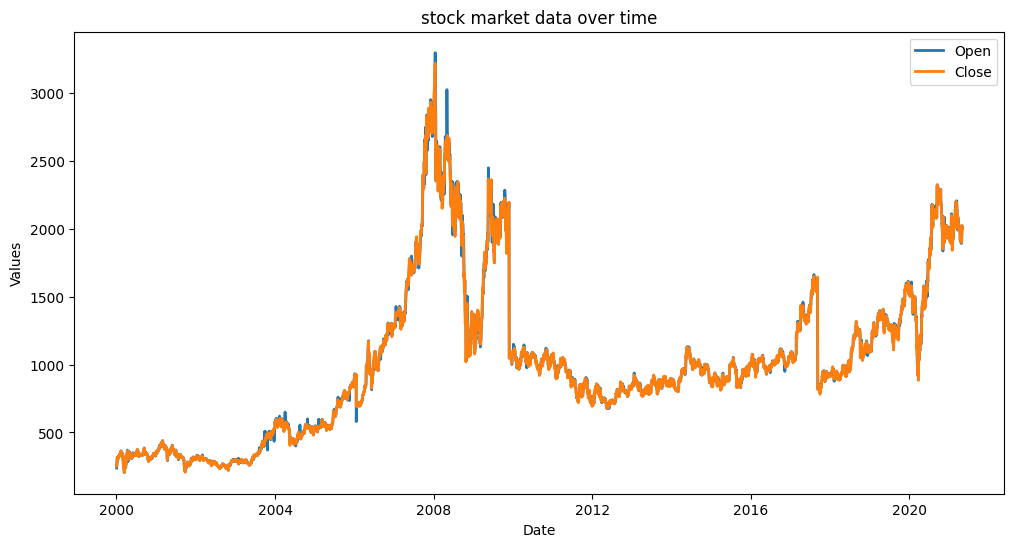

In [ ]:
# Showing the market values
plt.figure(figsize=(12, 6))
plt.plot(data['Open'], label ='Open', linewidth=2)
plt.plot(data['Close'], label ='Close', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('stock market data over time')
plt.legend()

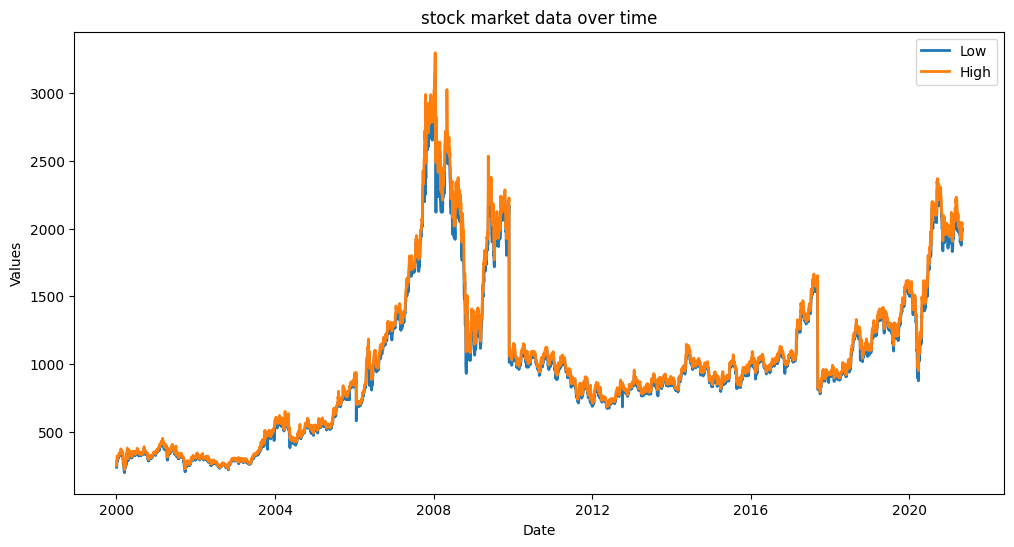

In [ ]:
# Showing the market values

plt.figure(figsize=(12, 6))
plt.plot(data['Low'], label ='Low', linewidth=2)
plt.plot(data['High'], label ='High', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('stock market data over time')
plt.legend()

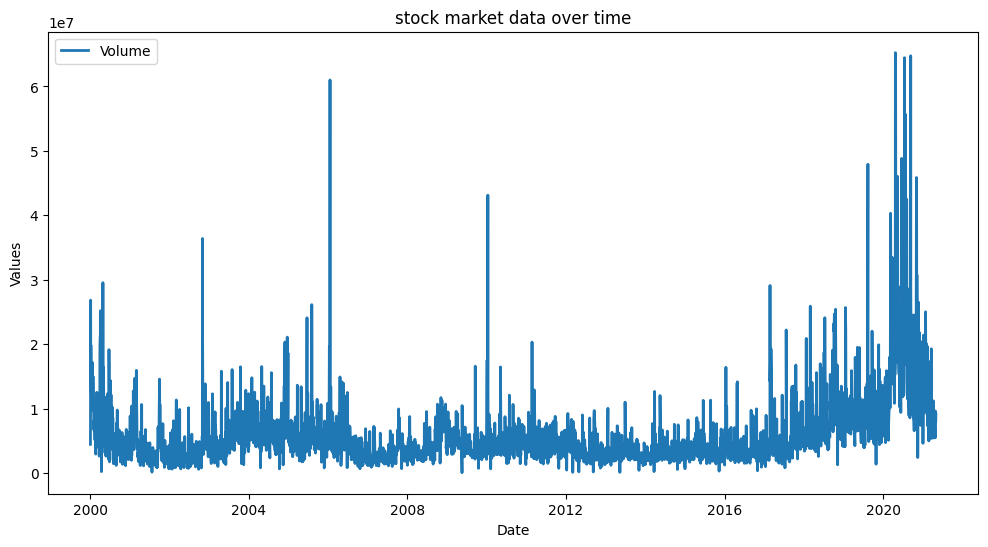

In [ ]:
# Showing the market values

plt.figure(figsize=(12, 6))
plt.plot(data['Volume'], label ='Volume', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('stock market data over time')
plt.legend()

## **Splitting Dataset For Training And Testing**



In [ ]:
X = data[['Open', 'Low', 'High', 'Volume']]
y = data['Close']

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4244, 4)
X_test shape:  (1062, 4)
y_train shape:  (4244,)
y_test shape:  (1062,)


In [ ]:
X_train

,Open,Low,High,Volume
Date,,,,
2009-02-17,1301.15,1258.20,1307.00,3828752
2020-06-30,1737.00,1695.55,1741.00,13973038
2002-05-30,260.35,260.35,269.65,2171241
2004-11-02,534.00,534.00,545.50,5071120
2008-05-07,2700.00,2624.00,2700.00,2549324
...,...,...,...,...
2012-05-21,686.50,686.00,700.70,2334127
2015-02-18,900.00,894.40,908.00,2248124
2020-11-11,2089.00,1978.10,2095.00,26178477


In [ ]:
X_test

,Open,Low,High,Volume
Date,,,,
2003-04-01,276.00,276.00,282.75,2662922
2016-03-16,1021.00,1005.45,1025.80,2529074
2021-01-20,2021.40,2001.40,2058.00,14271669
2012-04-12,733.30,733.30,745.60,2692505
2007-06-08,1664.00,1647.10,1697.85,3453696
...,...,...,...,...
2015-06-23,992.65,991.00,1002.70,3659045
2012-05-18,676.90,675.00,696.40,2363960
2005-01-25,505.90,498.45,509.90,8209129


In [ ]:
y_train

Date
2009-02-17    1267.30
2020-06-30    1704.10
2002-05-30     261.45
2004-11-02     543.40
2008-05-07    2688.95
               ...   
2012-05-21     695.50
2015-02-18     901.65
2020-11-11    1997.20
2021-01-01    1987.50
2003-06-12     308.00
Name: Close, Length: 4244, dtype: float64

In [ ]:
y_test

Date
2003-04-01     281.05
2016-03-16    1021.75
2021-01-20    2054.70
2012-04-12     743.30
2007-06-08    1657.05
               ...   
2015-06-23     995.00
2012-05-18     688.55
2005-01-25     501.60
2002-11-20     273.45
2017-03-09    1286.75
Name: Close, Length: 1062, dtype: float64

## **SVM Algorithm**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'linear'}


In [ ]:
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions and evaluate the model
predictions = best_svr_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
accuracy_percentage = r2 * 100

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (Accuracy) in Percentage:", accuracy_percentage)



Mean Squared Error: 100.12413687377983
Mean Absolute Error: 5.431624782893787
Root Mean Squared Error: 10.006204918638227
R-squared (Accuracy) in Percentage: 99.96873814295307


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Prices', color='blue', marker='o')
plt.scatter(range(len(predictions)), predictions, label='Predicted Prices', color='red', marker='x')
plt.title('Stock Market Prediction using Support Vector Machine')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-5.51489460e-01  7.37975261e-01  8.12736133e-01 -5.29263352e-08]


In [ ]:
print(regressor.intercept_)

-0.08311733135826671


In [ ]:
predicted= regressor.predict(X_test)

In [ ]:
print(X_test)

               Open      Low     High    Volume
Date                                           
2003-04-01   276.00   276.00   282.75   2662922
2016-03-16  1021.00  1005.45  1025.80   2529074
2021-01-20  2021.40  2001.40  2058.00  14271669
2012-04-12   733.30   733.30   745.60   2692505
2007-06-08  1664.00  1647.10  1697.85   3453696
...             ...      ...      ...       ...
2015-06-23   992.65   991.00  1002.70   3659045
2012-05-18   676.90   675.00   696.40   2363960
2005-01-25   505.90   498.45   509.90   8209129
2002-11-20   272.50   271.00   277.90   7450726
2017-03-09  1290.00  1281.50  1298.00   7107670

[1062 rows x 4 columns]


In [ ]:
dframe = pd.DataFrame(y_test, predicted)
dfr = pd.DataFrame({'actual price ':y_test, 'predicted price ':predicted})

print(dfr)

            actual price   predicted price 
Date                                       
2003-04-01         281.05        281.047167
2016-03-16        1021.75       1012.414241
2021-01-20        2054.70       2033.975390
2012-04-12         743.30        742.500477
2007-06-08        1657.05       1677.478725
...                   ...               ...
2015-06-23         995.00        998.551214
2012-05-18         688.55        690.611295
2005-01-25         501.60        502.741809
2002-11-20         273.45        275.092332
2017-03-09        1286.75       1288.766094

[1062 rows x 2 columns]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import math

In [ ]:
regressor.score(X_test, y_test)

0.999684215420945

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
predicted = regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = regressor.score(X_test, y_test)
accuracy_percentage = r2 * 100

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (Accuracy) in Percentage:", accuracy_percentage)

Mean Squared Error: 101.13813254431258
Mean Absolute Error: 5.598071510340372
Root Mean Squared Error: 10.056745623923904
R-squared (Accuracy) in Percentage: 99.9684215420945


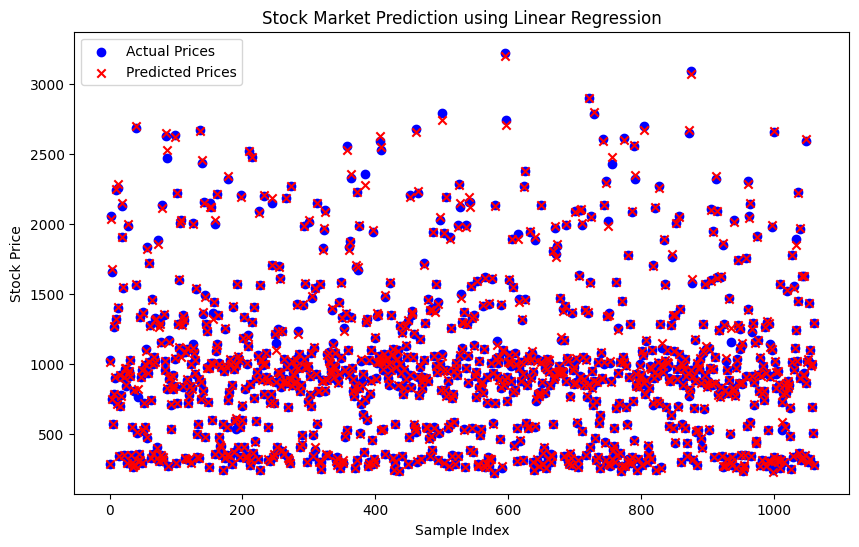

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Prices', color='blue', marker='o')
plt.scatter(range(len(predictions)), predictions, label='Predicted Prices', color='red', marker='x')
plt.title('Stock Market Prediction using Linear Regression')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **Random Forest Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


# Step 2: Train the Random Forest Regressor model with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 3: Train the final model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=150,
                      random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
predictions = best_rf_regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test, predictions)
accuracy_percentage = r2 * 100

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (Accuracy) in Percentage:", accuracy_percentage)

Mean Squared Error: 152.78207225051534
Mean Absolute Error: 6.840905093164826
Root Mean Squared Error: 12.360504530581077
R-squared (Accuracy) in Percentage: 99.95229670435961


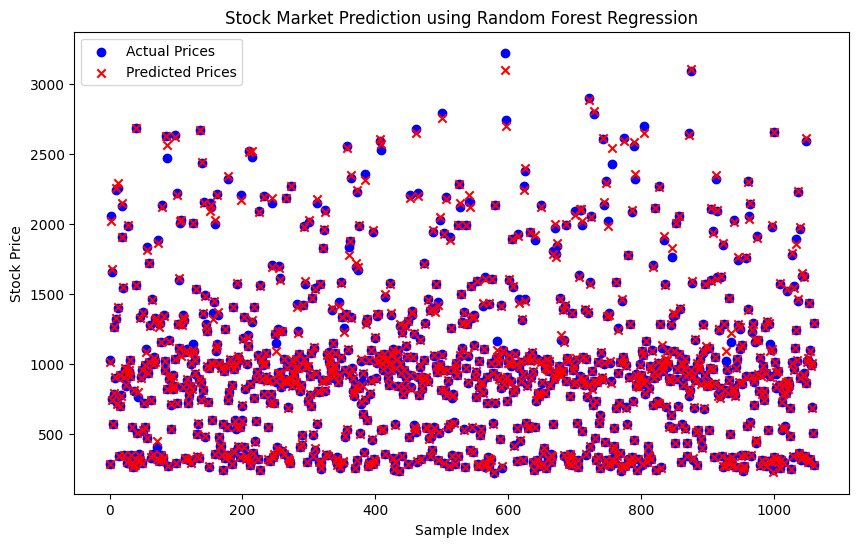

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Prices', color='blue', marker='o')
plt.scatter(range(len(predictions)), predictions, label='Predicted Prices', color='red', marker='x')
plt.title('Stock Market Prediction using Random Forest Regression')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **LSTM Algorithm**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [ ]:
# Extracting the 'Close' prices for prediction
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
# Convert the time series data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq_data = data[i:(i + seq_length), 0]
        X.append(seq_data)
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)


In [ ]:
# Set the sequence length
sequence_length = 10

# Create sequences
X, y = create_sequences(data_scaled, sequence_length)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
133/133 [==============================] - 7s 18ms/step - loss: 0.0043
Epoch 2/50
133/133 [==============================] - 3s 25ms/step - loss: 4.9602e-04
Epoch 3/50
133/133 [==============================] - 3s 26ms/step - loss: 4.7293e-04
Epoch 4/50
133/133 [==============================] - 1s 11ms/step - loss: 4.7811e-04
Epoch 5/50
133/133 [==============================] - 2s 12ms/step - loss: 4.2637e-04
Epoch 6/50
133/133 [==============================] - 2s 12ms/step - loss: 4.2751e-04
Epoch 7/50
133/133 [==============================] - 1s 11ms/step - loss: 3.7364e-04
Epoch 8/50
133/133 [==============================] - 2s 11ms/step - loss: 4.5757e-04
Epoch 9/50
133/133 [==============================] - 2s 12ms/step - loss: 3.2450e-04
Epoch 10/50
133/133 [==============================] - 2s 18ms/step - loss: 3.2209e-04
Epoch 11/50
133/133 [==============================] - 2s 12ms/step - loss: 3.2987e-04
Epoch 12/50
133/133 [==============================] - 1

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])


34/34 [==============================] - 1s 4ms/step


In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 831.8381329826774
Mean Absolute Error: 20.551879836748235
Root Mean Squared Error: 28.841604202656228


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test[0], predictions[:, 0])

# Calculate accuracy percentage
accuracy_percentage = r2 * 100

# Print results
print("R-squared (accuracy):", r2)
print("Accuracy Percentage:", accuracy_percentage)

R-squared (accuracy): 0.9974390278463402
Accuracy Percentage: 99.74390278463402


In [ ]:
if y_test.shape[0] != predictions.shape[0]:
    y_test = y_test.T

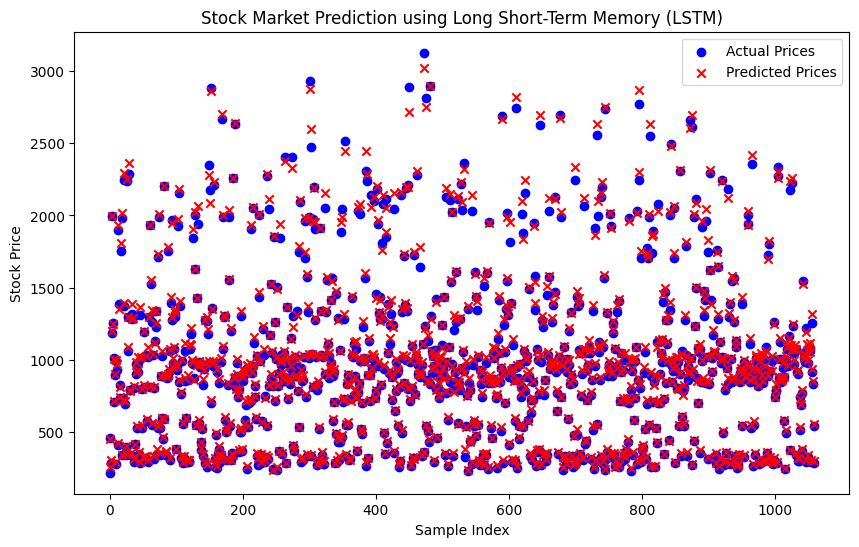

In [ ]:
# Plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Prices', color='blue', marker='o')
plt.scatter(range(len(predictions)), predictions, label='Predicted Prices', color='red', marker='x')
plt.title('Stock Market Prediction using Long Short-Term Memory (LSTM)')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **Dession Tree Regression**


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X = data[['Open', 'Low', 'High', 'Volume']]
y = data['Close']

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4244, 4)
X_test shape:  (1062, 4)
y_train shape:  (4244,)
y_test shape:  (1062,)


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [ ]:
print(X_train.shape)

(4244, 4)


In [ ]:
# Build the Decision Tree Regression model
decision_tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_decision_tree = DecisionTreeRegressor(**best_params)
best_decision_tree.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=10)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
predictions = best_decision_tree.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (accuracy)
r2 = r2_score(y_test, predictions)

# Calculate accuracy percentage
accuracy_percentage = r2 * 100

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (Accuracy):", r2)
print("Accuracy Percentage:", accuracy_percentage)

Mean Absolute Error (MAE): 8.156795879862393
Mean Squared Error (MSE): 216.5079472003966
R-squared (Accuracy): 0.9993239951218322
Accuracy Percentage: 99.93239951218322


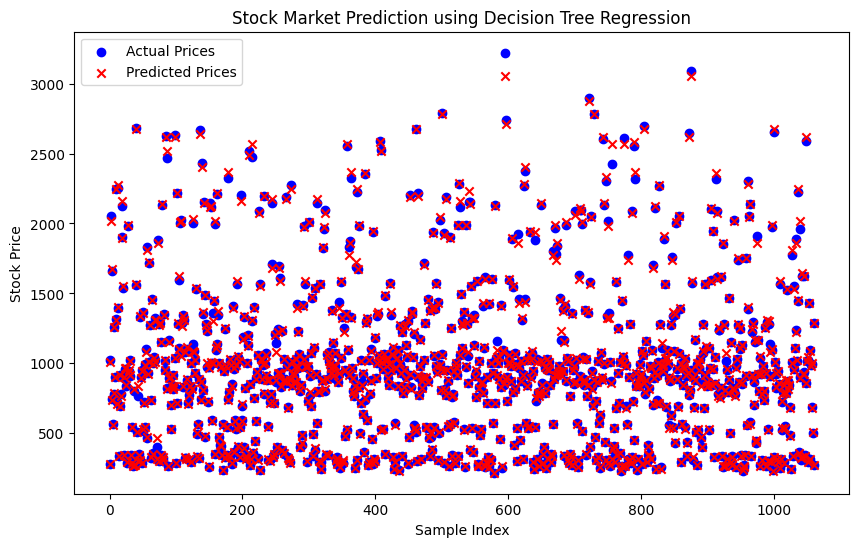

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Prices', color='blue', marker='o')
plt.scatter(range(len(predictions)), predictions, label='Predicted Prices', color='red', marker='x')
plt.title('Stock Market Prediction using Decision Tree Regression')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()